In [2]:
import pandas as pd
import numpy as py
import seaborn as sns 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import math


In [3]:
# Teammate 0 code begins here
# changes here
state_name_list = [ "Alabama", "Alaska", "Arizona", "Arkansas", "California",
                    "Colorado", "Connecticut", "DC", "Delaware", "Florida",
                    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana",
                    "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
                    "Maryland", "Massachusetts", "Michigan", "Minnesota", 
                    "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada",
                    "New_Hampshire", "New_Jersey", "New_Mexico", "New_York", "North_Carolina",
                    "North_Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania",
                    "Rhode_Island", "South_Carolina", "South_Dakota", "Tennessee", "Texas",
                    "Utah", "Vermont", "Virginia", "Washington", "West_Virginia", 
                    "Wisconsin", "Wyoming"
                  ]

# An empty collection of dataframes
crime_by_state = {}


debug = False


print("Importing *.csv files...")

# Base file path we will use for reusable code
base_file_path = "Raw_Data/CrimeStateByState_"

# Import the U.S. crime data totals
file_path = base_file_path + "US" + ".csv"
if (debug):
    print(f"Importing file: {file_path}")
us_totals_df = pd.read_csv(file_path, header=5)

# Iterate over and import the state-by-state crime data
for state in state_name_list:
    file_path = base_file_path + state + ".csv"
    if (debug):
        print(f"Importing file: {file_path}")
    crime_by_state[state] = pd.read_csv(file_path, header=5)

# Import the gun ownership data
file_path = "Raw_Data/gun_ownership_by_state.csv"
if (debug):
    print(f"Importing file: {file_path}")
gun_ownership_df = pd.read_csv(file_path)

print("File import complete.")

# Clean up the footer information that was at the bottom of each crime data .csv file
if debug:
    print("Cleaning up the .csv files...")
    
for state in state_name_list:
    if debug:
        print(f"The current state is {state}...")
    crime_by_state[state] = crime_by_state[state][crime_by_state[state]["Year"].astype(str).str.isnumeric()]
    
if debug:
    print(f"The current state is {state}...")
us_totals_df = us_totals_df[us_totals_df["Year"].astype(str).str.isnumeric()]

if debug:
    print("Cleanup of .csv files is complete.")

Importing *.csv files...
File import complete.


In [4]:
# Reindex the gun ownership data
try:
    gun_ownership_df.set_index("State", inplace=True)
except:
    pass


In [5]:
all_state_crime_2014 = pd.DataFrame()

# Build a dataframe of the 2014 crime data of all the states and index it to the state name
for state in state_name_list:

    if debug:
        print(f"The current state is {state}...")
    # Give each row the state name so that it can be used as an index later
    crime_by_state[state]["State"] = state
    # Use "this_state" as short-hand
    this_state = crime_by_state[state]
    # Grab the specific row we want
    this_state_crime_2014 = this_state[this_state["Year"] == "2014"]
    # We do this because .append() doesn't support "inplace"
    all_state_crime_2014 = all_state_crime_2014.append(this_state_crime_2014)
    

all_state_crime_2014.set_index(["State"], inplace=True)

try:
    gun_ownership_df = gun_ownership_df.join(all_state_crime_2014, how="outer")
except:
    pass

# Remove bad columns
gun_ownership_df = gun_ownership_df.loc[:, ~gun_ownership_df.columns.str.contains('^Unnamed')]


In [6]:
# dataPoints = ['Violent crime total']
# for col in dataPoints:
#     dat = []
#     for stateName in gun_ownership_df.index:
#         if stateName in crime_by_state:
#             dat.append(crime_by_state[stateName].tail(1)[col].values[0])
#         else:
#             dat.append(None)
#     gun_ownership_df[col] = dat
gun_ownership_df.head(60)

,Rank,# of guns per capita,# of guns registered,Year,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape /1,Revised rape /2,Robbery,...,Violent Crime rate,Murder and nonnegligent manslaughter rate,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate
State,,,,,,,,,,,,,,,,,,,,,
Alabama,6,33.150,161641,2014,4849377,20727,276.0,1436.0,2005.0,4701.0,...,427.4,5.7,29.6,41.3,96.9,283.4,3177.6,819.0,2149.5,209.1
Alaska,15,21.380,15824,2014,736732,4684,41.0,555.0,771.0,629.0,...,635.8,5.6,75.3,104.7,85.4,440.2,2760.0,427.6,2096.4,236.0
Arizona,10,25.610,179738,2014,6731484,26916,319.0,2464.0,3378.0,6249.0,...,399.9,4.7,36.6,50.2,92.8,252.1,3197.5,647.1,2289.1,261.3
Arkansas,8,26.570,79841,2014,2966369,14243,165.0,1182.0,1763.0,2050.0,...,480.1,5.6,39.8,59.4,69.1,346.0,3338.0,835.7,2313.5,188.8
California,44,8.710,344622,2014,38802500,153709,1699.0,8398.0,11527.0,48680.0,...,396.1,4.4,21.6,29.7,125.5,236.6,2441.1,522.3,1527.4,391.3
Colorado,28,16.480,92435,2014,5355866,16554,151.0,2121.0,3039.0,3039.0,...,309.1,2.8,39.6,56.7,56.7,192.8,2530.1,438.2,1857.1,234.8
Connecticut,14,22.960,82400,2014,3596677,8522,86.0,571.0,782.0,3159.0,...,236.9,2.4,15.9,21.7,87.8,125.0,1920.4,332.4,1418.1,169.9
DC,2,68.050,47228,2014,658893,8199,105.0,352.0,472.0,3497.0,...,1244.4,15.9,53.4,71.6,530.7,626.1,5182.5,526.0,4082.3,574.1
Delaware,49,5.040,4852,2014,935614,4576,54.0,249.0,386.0,1269.0,...,489.1,5.8,26.6,41.3,135.6,306.4,2982.0,616.5,2230.1,135.4


In [7]:
# Teammate 0 code ends here

In [8]:
# Teammate Carrie code begins here- Making Heat Maps 

In [9]:
#import gun ownership data, create dataframe
gun_ownership_df=pd.read_csv("Raw_Data/gun_ownership_by_state.csv")
gun_ownership_df.set_index("State",inplace=True)
gun_ownership_df



,Rank,# of guns per capita,# of guns registered
State,,,
Wyoming,1,229.240,132806
DC,2,68.050,47228
New_Hampshire,3,46.760,64135
New_Mexico,4,46.730,97580
Virginia,5,36.340,307822
Alabama,6,33.150,161641
Idaho,7,28.860,49566
Arkansas,8,26.570,79841
Nevada,9,25.640,76888


In [10]:
#create dataframe of just state and guns 
df2= gun_ownership_df[[ "# of guns per capita"]]
df2
gun_ownership_dict=df2.to_dict("dict")
gun_ownership_dict2={key: float(value) for (key, value) in gun_ownership_dict["# of guns per capita"].items() if key != "North"}


In [11]:
gun_ownership_dict["# of guns per capita"]

{'Wyoming': 229.24,
 'DC': 68.05,
 'New_Hampshire': 46.76,
 'New_Mexico': 46.73,
 'Virginia': 36.34,
 'Alabama': 33.15,
 'Idaho': 28.86,
 'Arkansas': 26.57,
 'Nevada': 25.64,
 'Arizona': 25.61,
 'Louisiana': 24.94,
 'South_Dakota': 24.29,
 'Utah': 23.48,
 'Connecticut': 22.96,
 'Alaska': 21.38,
 'Montana': 21.06,
 'South_Carolina': 21.01,
 'Texas': 20.79,
 'West_Virginia': 19.42,
 'Pennsylvania': 18.45,
 'Georgia': 18.22,
 'Kentucky': 18.2,
 'Oklahoma': 18.13,
 'Kansas': 18.06,
 'North_Dakota': 17.56,
 'Indiana': 17.1,
 'Maryland': 17.03,
 'Colorado': 16.48,
 'Florida': 16.35,
 'Ohio': 14.87,
 'North_Carolina': 14.818,
 'Oregon': 14.815999999999999,
 'Tennessee': 14.76,
 'Minnesota': 14.22,
 'Washington': 12.4,
 'Missouri': 11.94,
 'Mississippi': 11.89,
 'Nebraska': 11.57,
 'Maine': 11.5,
 'Illinois': 11.44,
 'Wisconsin': 11.19,
 'Vermont': 9.41,
 'Iowa': 9.05,
 'California': 8.71,
 'Michigan': 6.59,
 'New_Jersey': 6.38,
 'Hawaii': 5.5,
 'Massachusetts': 5.41,
 'Delaware': 5.04,
 'Rhod

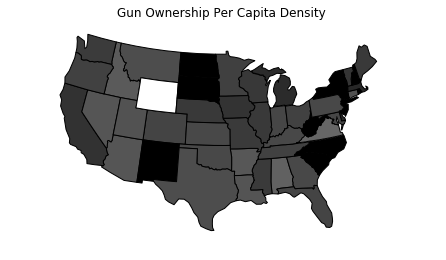

In [13]:

# Create HeatMap 

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

gun_ownership_dict2
  

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

ax.set_title('Gun Ownership Per Capita Density ')

#for state in shpreader.Reader(states_shp).geometries():
for astate in shpreader.Reader(states_shp).records():

    ### You want to replace the following code with code that sets the
    ### facecolor as a gradient based on the population density above
    #facecolor = [0.9375, 0.9375, 0.859375]

    edgecolor = 'black'

    try:
        # use the name of this state to get pop_density
        state_dens = gun_ownership_dict2[ astate.attributes['name'] ]
    except:
        state_dens = 0
    #print(state_dens)

    # simple scheme to assign color to each state
    scaled_state_dens=math.sqrt(state_dens)
    scaling_factor=1.0/math.sqrt(229.24)
    
    facecolor= (scaling_factor*scaled_state_dens, scaling_factor*scaled_state_dens,scaling_factor*scaled_state_dens)

    # `astate.geometry` is the polygon to plot
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)

plt.show()


In [ ]:
crime_by_state_df=pd.read_csv("Raw_Data/CrimeStatebyState_US.csv")
crime_by_state_df.head()

In [1]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

gun_ownership_dict2
  

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

ax.set_title('Gun Ownership Per Capita Density ')

#for state in shpreader.Reader(states_shp).geometries():
for astate in shpreader.Reader(states_shp).records():

    ### You want to replace the following code with code that sets the
    ### facecolor as a gradient based on the population density above
    #facecolor = [0.9375, 0.9375, 0.859375]

    edgecolor = 'black'

    try:
        # use the name of this state to get pop_density
        state_dens = gun_ownership_dict2[ astate.attributes['name'] ]
    except:
        state_dens = 0
    #print(state_dens)

    # simple scheme to assign color to each state
    scaled_state_dens=math.sqrt(state_dens)
    scaling_factor=1.0/math.sqrt(229.24)
    
    facecolor= (scaling_factor*scaled_state_dens, scaling_factor*scaled_state_dens,scaling_factor*scaled_state_dens)

    # `astate.geometry` is the polygon to plot
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)

plt.show()

NameError: name 'plt' is not defined

In [ ]:
# Heat map, robbery by state

In [14]:
all_state_crime_2014.head()

,Year,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape /1,Revised rape /2,Robbery,Aggravated assault,Property crime total,Burglary,...,Murder and nonnegligent manslaughter rate,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate,Unnamed: 22
State,,,,,,,,,,,,,,,,,,,,,
Alabama,2014,4849377,20727,276.0,1436.0,2005.0,4701.0,13745.0,154094.0,39715.0,...,5.7,29.6,41.3,96.9,283.4,3177.6,819.0,2149.5,209.1,NaN
Alaska,2014,736732,4684,41.0,555.0,771.0,629.0,3243.0,20334.0,3150.0,...,5.6,75.3,104.7,85.4,440.2,2760.0,427.6,2096.4,236.0,NaN
Arizona,2014,6731484,26916,319.0,2464.0,3378.0,6249.0,16970.0,215240.0,43562.0,...,4.7,36.6,50.2,92.8,252.1,3197.5,647.1,2289.1,261.3,NaN
Arkansas,2014,2966369,14243,165.0,1182.0,1763.0,2050.0,10265.0,99018.0,24790.0,...,5.6,39.8,59.4,69.1,346.0,3338.0,835.7,2313.5,188.8,NaN
California,2014,38802500,153709,1699.0,8398.0,11527.0,48680.0,91803.0,947192.0,202670.0,...,4.4,21.6,29.7,125.5,236.6,2441.1,522.3,1527.4,391.3,NaN


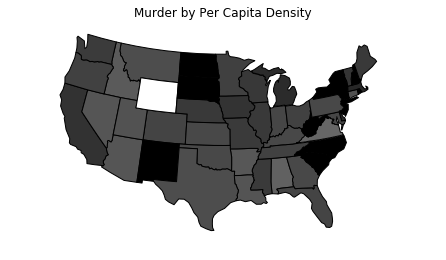

In [23]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

murder_state_df
  

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

ax.set_title('Murder by Per Capita Density')

#for state in shpreader.Reader(states_shp).geometries():
for astate in shpreader.Reader(states_shp).records():

    ### You want to replace the following code with code that sets the
    ### facecolor as a gradient based on the population density above
    #facecolor = [0.9375, 0.9375, 0.859375]

    edgecolor = 'black'

    try:
        # use the name of this state to get pop_density
        state_dens = gun_ownership_dict2[ astate.attributes['name'] ]
    except:
        state_dens = 0
    #print(state_dens)

    # simple scheme to assign color to each state
    scaled_state_dens=math.sqrt(state_dens)
    scaling_factor=1.0/math.sqrt(229.24)
    
    facecolor= (scaling_factor*scaled_state_dens, scaling_factor*scaled_state_dens,scaling_factor*scaled_state_dens)

    # `astate.geometry` is the polygon to plot
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)

plt.show()

In [16]:
# Heat map, motor vechile theft by state 
all_state_crime_2014

,Year,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape /1,Revised rape /2,Robbery,Aggravated assault,Property crime total,Burglary,...,Murder and nonnegligent manslaughter rate,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate,Unnamed: 22
State,,,,,,,,,,,,,,,,,,,,,
Alabama,2014,4849377,20727,276.0,1436.0,2005.0,4701.0,13745.0,154094.0,39715.0,...,5.7,29.6,41.3,96.9,283.4,3177.6,819.0,2149.5,209.1,NaN
Alaska,2014,736732,4684,41.0,555.0,771.0,629.0,3243.0,20334.0,3150.0,...,5.6,75.3,104.7,85.4,440.2,2760.0,427.6,2096.4,236.0,NaN
Arizona,2014,6731484,26916,319.0,2464.0,3378.0,6249.0,16970.0,215240.0,43562.0,...,4.7,36.6,50.2,92.8,252.1,3197.5,647.1,2289.1,261.3,NaN
Arkansas,2014,2966369,14243,165.0,1182.0,1763.0,2050.0,10265.0,99018.0,24790.0,...,5.6,39.8,59.4,69.1,346.0,3338.0,835.7,2313.5,188.8,NaN
California,2014,38802500,153709,1699.0,8398.0,11527.0,48680.0,91803.0,947192.0,202670.0,...,4.4,21.6,29.7,125.5,236.6,2441.1,522.3,1527.4,391.3,NaN
Colorado,2014,5355866,16554,151.0,2121.0,3039.0,3039.0,10325.0,135510.0,23472.0,...,2.8,39.6,56.7,56.7,192.8,2530.1,438.2,1857.1,234.8,NaN
Connecticut,2014,3596677,8522,86.0,571.0,782.0,3159.0,4495.0,69070.0,11955.0,...,2.4,15.9,21.7,87.8,125.0,1920.4,332.4,1418.1,169.9,NaN
DC,2014,658893,8199,105.0,352.0,472.0,3497.0,4125.0,34147.0,3466.0,...,15.9,53.4,71.6,530.7,626.1,5182.5,526.0,4082.3,574.1,NaN
Delaware,2014,935614,4576,54.0,249.0,386.0,1269.0,2867.0,27900.0,5768.0,...,5.8,26.6,41.3,135.6,306.4,2982.0,616.5,2230.1,135.4,NaN


In [22]:
# Create a data frame for just states and murder: 
murder_state_df=pd.DataFrame()
murder_state_df= all_state_crime_2014["Murder and nonnegligent Manslaughter"]
murder_state_df

State
Alabama            276.0
Alaska              41.0
Arizona            319.0
Arkansas           165.0
California        1699.0
Colorado           151.0
Connecticut         86.0
DC                 105.0
Delaware            54.0
Florida           1149.0
Georgia            580.0
Hawaii              26.0
Idaho               32.0
Illinois           685.0
Indiana            330.0
Iowa                60.0
Kansas              91.0
Kentucky           160.0
Louisiana          477.0
Maine               21.0
Maryland           365.0
Massachusetts      132.0
Michigan           535.0
Minnesota           88.0
Mississippi        258.0
Missouri           403.0
Montana             37.0
Nebraska            54.0
Nevada             170.0
New_Hampshire       12.0
New_Jersey         349.0
New_Mexico         101.0
New_York           617.0
North_Carolina     510.0
North_Dakota        22.0
Ohio               464.0
Oklahoma           175.0
Oregon              81.0
Pennsylvania       614.0
Rhode_Island       

In [24]:
# Create heat map aggrevated assault 
# Create a data frame for just states and murder: 
assault_state_df=pd.DataFrame()
assault_state_df= all_state_crime_2014["Aggravated assault"]
assault_state_df

State
Alabama           13745.0
Alaska             3243.0
Arizona           16970.0
Arkansas          10265.0
California        91803.0
Colorado          10325.0
Connecticut        4495.0
DC                 4125.0
Delaware           2867.0
Florida           72895.0
Georgia           22052.0
Hawaii             2102.0
Idaho              2623.0
Illinois          27520.0
Indiana           14686.0
Iowa               6264.0
Kansas             7259.0
Kentucky           4404.0
Louisiana         16387.0
Maine               890.0
Maryland          15133.0
Massachusetts     18051.0
Michigan          27519.0
Minnesota          6729.0
Mississippi        4592.0
Missouri          18482.0
Montana            2532.0
Nebraska           3316.0
Nevada            10564.0
New_Hampshire      1459.0
New_Jersey        11225.0
New_Mexico         8797.0
New_York          45303.0
North_Carolina    21421.0
North_Dakota       1407.0
Ohio              14771.0
Oklahoma          10744.0
Oregon             5592.0
Pennsy

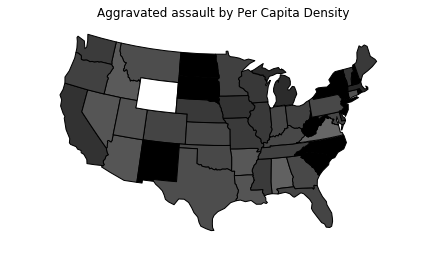

In [26]:
# Create the map 
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

assault_state_df
  

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

ax.set_title('Aggravated assault by Per Capita Density')

#for state in shpreader.Reader(states_shp).geometries():
for astate in shpreader.Reader(states_shp).records():

    ### You want to replace the following code with code that sets the
    ### facecolor as a gradient based on the population density above
    #facecolor = [0.9375, 0.9375, 0.859375]

    edgecolor = 'black'

    try:
        # use the name of this state to get pop_density
        state_dens = gun_ownership_dict2[ astate.attributes['name'] ]
    except:
        state_dens = 0
    #print(state_dens)

    # simple scheme to assign color to each state
    scaled_state_dens=math.sqrt(state_dens)
    scaling_factor=1.0/math.sqrt(229.24)
    
    facecolor= (scaling_factor*scaled_state_dens, scaling_factor*scaled_state_dens,scaling_factor*scaled_state_dens)

    # `astate.geometry` is the polygon to plot
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)

plt.show()

In [29]:
# Create Heat Map motor vechile theft 
motor_theft_state_df=pd.DataFrame()
motor_theft_state_df= all_state_crime_2014["Motor vehicle theft rate"]
motor_theft_state_df


State
Alabama           209.1
Alaska            236.0
Arizona           261.3
Arkansas          188.8
California        391.3
Colorado          234.8
Connecticut       169.9
DC                574.1
Delaware          135.4
Florida           214.0
Georgia           266.0
Hawaii            273.3
Idaho             101.6
Illinois          135.5
Indiana           210.1
Iowa              133.6
Kansas            237.8
Kentucky          143.2
Louisiana         212.7
Maine              60.1
Maryland          219.2
Massachusetts     122.5
Michigan          213.5
Minnesota         153.3
Mississippi       150.9
Missouri          269.8
Montana           199.6
Nebraska          236.8
Nevada            358.7
New_Hampshire      64.6
New_Jersey        131.0
New_Mexico        301.6
New_York           79.7
North_Carolina    137.1
North_Dakota      204.7
Ohio              155.4
Oklahoma          272.9
Oregon            240.5
Pennsylvania      102.0
Rhode_Island      173.7
South_Carolina    267.0
South_Dako

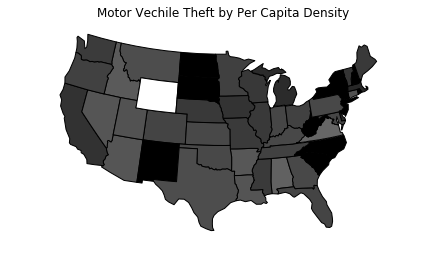

In [30]:
# Create the map 
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

motor_theft_state_df
  

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

ax.set_title('Motor Vechile Theft by Per Capita Density')

#for state in shpreader.Reader(states_shp).geometries():
for astate in shpreader.Reader(states_shp).records():

    ### You want to replace the following code with code that sets the
    ### facecolor as a gradient based on the population density above
    #facecolor = [0.9375, 0.9375, 0.859375]

    edgecolor = 'black'

    try:
        # use the name of this state to get pop_density
        state_dens = gun_ownership_dict2[ astate.attributes['name'] ]
    except:
        state_dens = 0
    #print(state_dens)

    # simple scheme to assign color to each state
    scaled_state_dens=math.sqrt(state_dens)
    scaling_factor=1.0/math.sqrt(229.24)
    
    facecolor= (scaling_factor*scaled_state_dens, scaling_factor*scaled_state_dens,scaling_factor*scaled_state_dens)

    # `astate.geometry` is the polygon to plot
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)

plt.show()

In [32]:
# Create Burgularly Heat Map 
burg_state_df=pd.DataFrame()
burg_state_df= all_state_crime_2014["Burglary rate"]
burg_state_df

State
Alabama           819.0
Alaska            427.6
Arizona           647.1
Arkansas          835.7
California        522.3
Colorado          438.2
Connecticut       332.4
DC                526.0
Delaware          616.5
Florida           719.9
Georgia           756.9
Hawaii            547.9
Idaho             393.3
Illinois          388.2
Indiana           559.3
Iowa              464.4
Kansas            545.0
Kentucky          526.7
Louisiana         824.5
Maine             378.2
Maryland          468.7
Massachusetts     370.1
Michigan          445.9
Minnesota         380.7
Mississippi       813.3
Missouri          581.5
Montana           351.2
Nebraska          422.5
Nevada            772.3
New_Hampshire     313.7
New_Jersey        354.8
New_Mexico        887.3
New_York          257.2
North_Carolina    798.2
North_Dakota      366.1
Ohio              680.0
Oklahoma          760.9
Oregon            434.0
Pennsylvania      357.5
Rhode_Island      457.1
South_Carolina    759.9
South_Dako

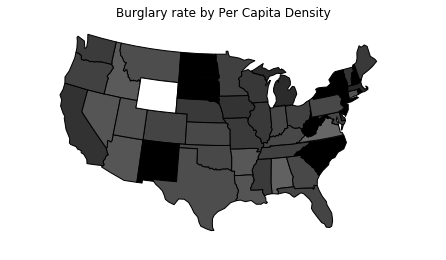

In [33]:
# Create the map 
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

burg_state_df
  

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

ax.set_title('Burglary rate by Per Capita Density')

#for state in shpreader.Reader(states_shp).geometries():
for astate in shpreader.Reader(states_shp).records():

    ### You want to replace the following code with code that sets the
    ### facecolor as a gradient based on the population density above
    #facecolor = [0.9375, 0.9375, 0.859375]

    edgecolor = 'black'

    try:
        # use the name of this state to get pop_density
        state_dens = gun_ownership_dict2[ astate.attributes['name'] ]
    except:
        state_dens = 0
    #print(state_dens)

    # simple scheme to assign color to each state
    scaled_state_dens=math.sqrt(state_dens)
    scaling_factor=1.0/math.sqrt(229.24)
    
    facecolor= (scaling_factor*scaled_state_dens, scaling_factor*scaled_state_dens,scaling_factor*scaled_state_dens)

    # `astate.geometry` is the polygon to plot
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)

plt.show()

In [ ]:
gun_ownership_by_state.txt="gun_ownership_by_state.txt"
gun_ownership_by_state.txt.head()


In [ ]:
with open ("gun_ownership_by_state.txt", "r") as myfile:
    gun_ownership=myfile.readlines()

In [ ]:
# Teammate Carrie code ends here

In [ ]:
# Teammate 2 code begins here

In [ ]:
# Teammate 2 code ends here

In [ ]:
# Teammate 3 code begins here

In [ ]:
# Teammate 3 code ends here